# Step 1 - Defining the Problem
We want to predict whether the person survived or not.

# Step 2 - Building Dataset  

# 2. 1 Dataset Collection

In [1]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.19.5
1.2.4
3.3.3
0.11.1


In [3]:
# Laoding the dataset
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 2 EDA, Feature Engineering and Feature Selection

## 2.2.1 - Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='count'>

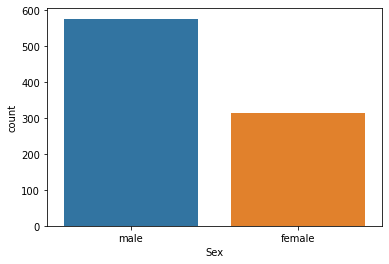

In [7]:
# Gender plot 
# Ques. What is the distribution of male and females?
sns.countplot(x='Sex', data=df)

### Observation
There are more number of males than females.

<AxesSubplot:xlabel='Sex', ylabel='count'>

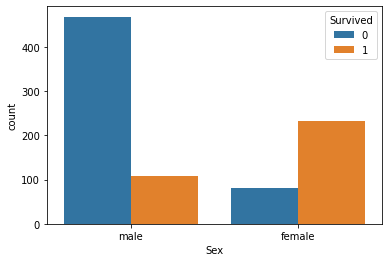

In [8]:
# Ques. Out of total males and total females, how many of them survived?
sns.countplot(x='Sex', data=df, hue='Survived')

### Observation
Out of males, more than 70-80% didn't survived.

Out of females, less than 20-30% didn't survived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

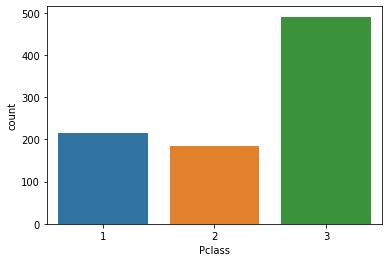

In [9]:
# Passenger class counts
sns.countplot(x='Pclass', data=df)

### Observation
There are many passengers in class 3.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

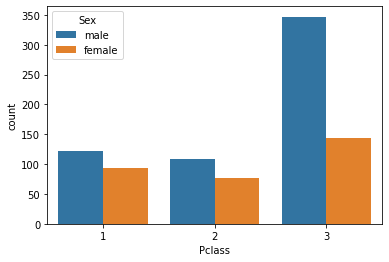

In [10]:
# Ques. How many males and females are there in each passenger class?
sns.countplot(x='Pclass', data=df, hue='Sex')

### Observation
There are more number of males in passeger class 3 than females.

In passenger class 1 and 2, there are approximately same number of males and females.

## 2.2.2 - Data Cleaning and Data Manipulation

In [11]:
# Now, let us find how many childrens are there in the dataset
def dataset_children(passengers):
    age, sex = passengers
    if(age<16):
        return "Child"
    else:
        return sex

df['Person'] = df[['Age', 'Sex']].apply(dataset_children, axis = 1)

<AxesSubplot:xlabel='Person', ylabel='count'>

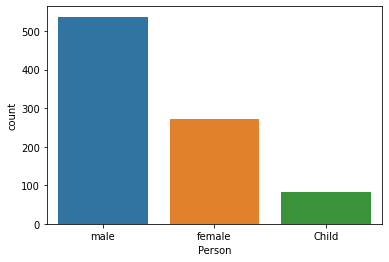

In [12]:
# Ques. What are the distribution of person in dataset?
sns.countplot(x='Person', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

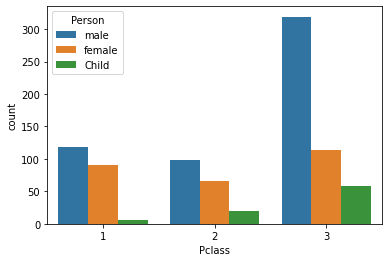

In [13]:
sns.countplot(x='Pclass', data=df, hue = 'Person')

### Observation
Very few children in the first and second class. However, there are good amount of children in third class.

c:\users\neeraj kumar singh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

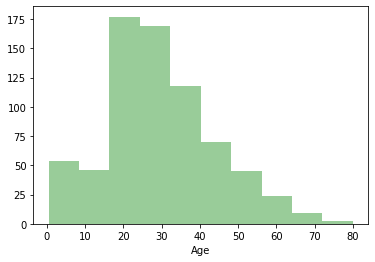

In [14]:
sns.distplot(a=df["Age"], kde=False, bins = 10, color='green')

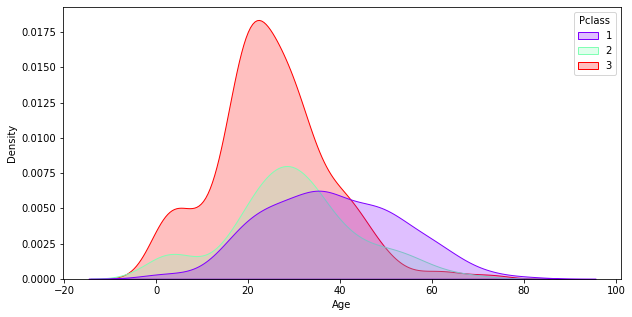

In [15]:
# Ques. What is the PDF of different Passenger classes with respect to age?
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="Age", hue='Pclass', fill = True, palette='rainbow')
plt.show()

### Handling Missing Values

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
dtype: int64

### Observation
There are about 20% of data missing in age column and more than 80-90% data missing in cabin column.

#### Handling AGE missing values

In [17]:
# Here, you need to do it properly. You can replace the age missing values on the basis of many things like-
#    1. Their passenger class
#    2. Their gender
#    3. Title in their names

# Here, we will look at option 2.

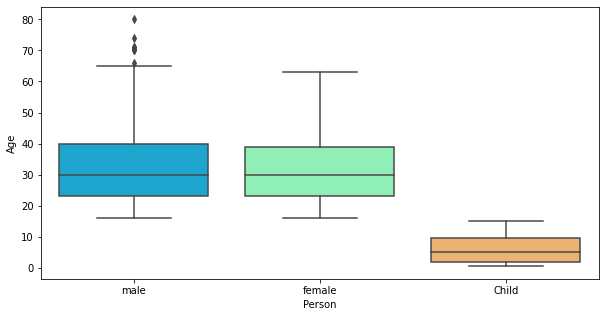

In [18]:
# Ques. What is the PDF of different Passenger classes with respect to age?
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Person", y="Age", palette='rainbow')
plt.show()

In [19]:
# Finding exact average age of males, females and children
maleAvg = df[df["Person"] == 'male']["Age"].mean()
femaleAvg = df[df["Person"] == 'female']["Age"].mean()
childAvg = df[df["Person"] == 'Child']["Age"].mean()
print(maleAvg)
print(femaleAvg)
print(childAvg)

33.17312348668281
32.0
6.369518072289156


In [20]:
pd.isnull(df["Age"]).sum()

177

In [21]:
# Function for Replacing missing age values
def age_imputation(ageCategories):
    age, person = ageCategories
    if(pd.isnull(age)):
        if(person == 'male'):
            return maleAvg
        elif(person=='female'):
            return femaleAvg
        else:
            return childAvg  
    else:
        return age

df["Age"] = df[["Age", "Person"]].apply(age_imputation, axis = 1)

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
dtype: int64

#### Handling Cabin Column

In [23]:
# Since there are a lot of missing values and it is also that relevant in predictions, we are going to drop
# the whole column
df.drop('Cabin', axis=1, inplace=True)

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Person         0
dtype: int64

#### Handling Embarked Missing values

In [25]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
# From above, we can clearly see that most number of passengers are from S. So, let's replace the two missing
# values in Embarked column with S
df["Embarked"] = df["Embarked"].fillna('S')

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Person         0
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

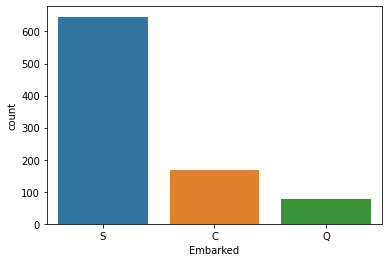

In [28]:
# Ques. What are the counts of the passengers on the basis of Embarked?
sns.countplot(x='Embarked', data=df)

### Observation
Most passengers started their journey from Southampton (S).

<AxesSubplot:xlabel='Embarked', ylabel='count'>

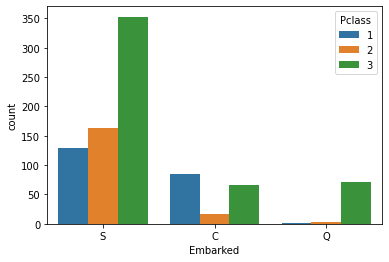

In [29]:
# Ques. What are fractions of passengers from S, C, and Q belonging to which passenger class?
sns.countplot(x='Embarked', data=df, hue="Pclass")

### Observation
The data is not balanced.

In [30]:
# Now, let's find out who are with family and who are alone
df['Alone'] = df['Parch'] + df['SibSp']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,0


In [31]:
def withFamily(alone):
    if(alone>0):
        return 1
    else:
        return alone
df["Alone"] = df["Alone"].apply(withFamily)

In [32]:
df["Alone"].value_counts()

0    537
1    354
Name: Alone, dtype: int64

### Observation
The value 0 in 'Alone' column is representing the passengers who are travelling alone.

<AxesSubplot:xlabel='Alone', ylabel='count'>

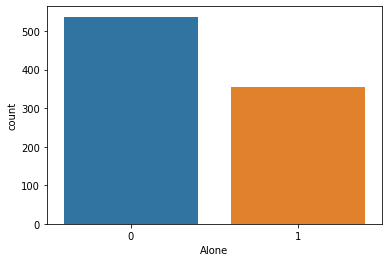

In [33]:
# Let's visulaize it
sns.countplot(x='Alone', data=df)

### Observation
Most passengers are alons.

<AxesSubplot:xlabel='Alone', ylabel='count'>

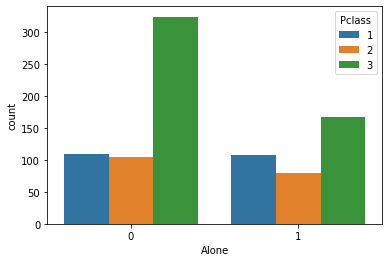

In [34]:
# Que.What are the Passenger class of passengers with family and without family?
sns.countplot(x='Alone', data=df, hue='Pclass')

### Observation
Many alone passengers belongs to passenger class 3.

## 2.2.3 - Relationship Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

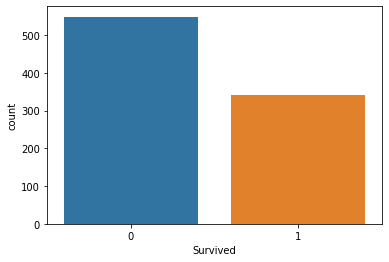

In [35]:
# Ques. How many passengers survived?
sns.countplot(data=df, x='Survived')

### Observation
Many passengers didn't survived.

### Relationship Analysis of Categorical Features and Discrete Features

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Person       891 non-null    object 
 12  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [37]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) < 5]
print(categorical_features)
print(discrete_features)

['Name', 'Sex', 'Ticket', 'Embarked', 'Person']
['Survived', 'Pclass', 'Sex', 'Embarked', 'Person', 'Alone']


<AxesSubplot:xlabel='Survived', ylabel='count'>

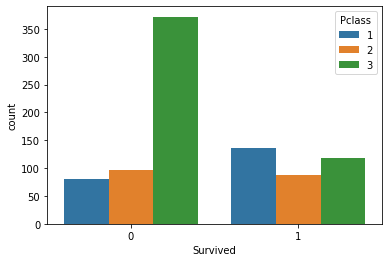

In [38]:
# Ques. How many survived or not survived with respect to their passenger class?
sns.countplot(data=df, x='Survived', hue="Pclass")

### Observation
So, Pclass has some relationship with survival of the passenges.

<AxesSubplot:xlabel='Survived', ylabel='count'>

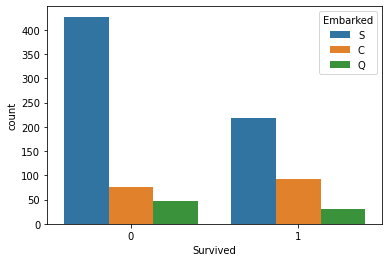

In [39]:
# Ques. How many survived or not survived with respect to the starting point of their journey?
sns.countplot(data=df, x='Survived', hue="Embarked")

### Observation
So, Embarked features has some relationship with survival of the passenges.

<AxesSubplot:xlabel='Survived', ylabel='count'>

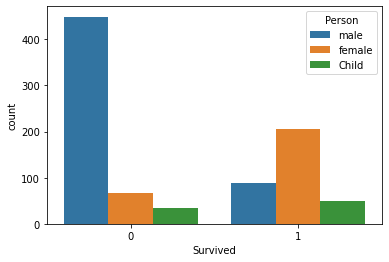

In [40]:
# Ques. How many survived or not survived with respect to which type of person they are?
sns.countplot(data=df, x='Survived', hue="Person")

### Observation
So, Person type has some relationship with survival of the passenges.

<AxesSubplot:xlabel='Survived', ylabel='count'>

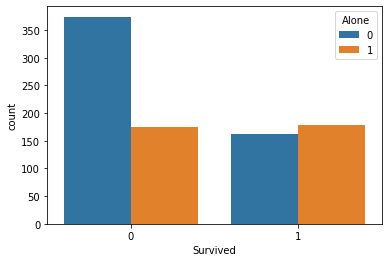

In [41]:
# Ques. How many survived or not survived with respect to whether they were alone or not?
sns.countplot(data=df, x='Survived', hue="Alone")

### Observation
Clearly, there is some relationship between survival and whether the passenger was alone or not.

So, we will include Pclass, Alone, Person, and Embarked column in the final dataset and drop other categorical and discrete features as they don't have good relationship with Survived column.

### Relationship Analysis of Numerical Features (Using Correlation Matrix)

In [42]:
corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Alone
PassengerId,1.000000,-0.005007,-0.035144,0.032158,-0.057527,-0.001652,0.012658,-0.057462
Survived,-0.005007,1.000000,-0.338481,-0.082512,-0.035322,0.081629,0.257307,0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.313421,0.083081,0.018443,-0.549500,-0.135207
Age,0.032158,-0.082512,-0.313421,1.000000,-0.231641,-0.191365,0.080765,-0.196213
SibSp,-0.057527,-0.035322,0.083081,-0.231641,1.000000,0.414838,0.159651,0.584471
Parch,-0.001652,0.081629,0.018443,-0.191365,0.414838,1.000000,0.216225,0.583398
Fare,0.012658,0.257307,-0.549500,0.080765,0.159651,0.216225,1.000000,0.271832
Alone,-0.057462,0.203367,-0.135207,-0.196213,0.584471,0.583398,0.271832,1.000000


<AxesSubplot:>

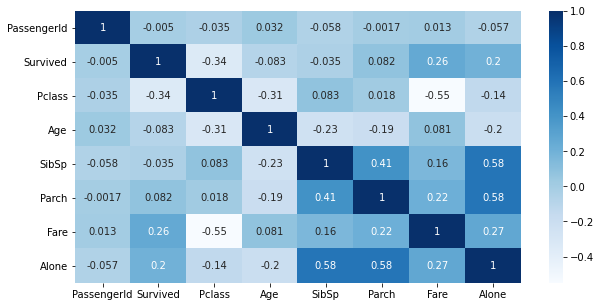

In [43]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

### Observation
Fair and Age and highly correlated with the Survived column. So, therefore we will include them in the final data and drop all other numerical features.

### Handling Categorical features

In [44]:
person_dummies = pd.get_dummies(df["Person"], drop_first=True)
embarked_dummies = pd.get_dummies(df["Embarked"], drop_first=True)
pclass_dummies = pd.get_dummies(df["Pclass"], drop_first = True)

In [45]:
pclass_dummies.columns = ['class_2', 'class_3']

In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Person         0
Alone          0
dtype: int64

In [47]:
import math
# math.ceil is used here for rounding off the numbers to its nearest integer value
df["Age"] = df["Age"].apply(math.ceil)
df["Fare"] = df["Fare"].apply(math.ceil)

In [48]:
# Concateneting the columns formed after one-hot encoding
df = pd.concat([df, person_dummies, embarked_dummies, pclass_dummies], axis = 1)

In [49]:
pd.set_option("display.max_columns", None)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Alone,female,male,Q,S,class_2,class_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,8,S,male,1,0,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,72,C,female,1,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,S,female,0,1,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,54,S,female,1,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,9,S,male,0,0,1,0,1,0,1


In [50]:
# Now dropping irrelvenet columns
df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Person'],
       axis = 1, inplace = True)

In [51]:
df.head()

,Survived,Age,Fare,Alone,female,male,Q,S,class_2,class_3
0,0,22,8,1,0,1,0,1,0,1
1,1,38,72,1,1,0,0,0,0,0
2,1,26,8,0,1,0,0,1,0,1
3,1,35,54,1,1,0,0,1,0,0
4,0,35,9,0,0,1,0,1,0,1


### Train-Test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'], 
                                                   test_size=0.2, random_state=0)

In [53]:
X_train.head()

,Age,Fare,Alone,female,male,Q,S,class_2,class_3
140,32,16,1,1,0,0,0,0,1
439,31,11,0,0,1,0,1,1,0
817,31,38,1,0,1,0,0,1,0
378,20,5,0,0,1,0,0,0,1
491,21,8,0,0,1,0,1,0,1


In [54]:
y_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

# Step 3 - Model Building and Training

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

# Step 4 - Model Evaluation

In [56]:
y_pred = lr.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
scr = accuracy_score(y_test, y_pred)
print(cm)
print(scr)

[[93 17]
 [18 51]]
0.8044692737430168


In [58]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

